In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('yeast', 'train')
X_test, y_test, _, _ = load_dataset('yeast', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

yeast:train - exists, not redownloading
yeast:test - exists, not redownloading


In [4]:
bls = bls3.broadnet(maptimes = 30,
               enhencetimes = 40,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=20
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98245 minvalue 0.021 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97662 minvalue 0.0177 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97424 minvalue 0.01743 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97536 minvalue 0.01721 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97127 minvalue 0.02289 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98448 minvalue 0.02432 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98108 minvalue 0.019 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9819 minvalue 0.0172 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96548 minvalue 0.02361 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97842 minvalue 0.01942 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98085 minvalue 0.0268 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98233 minvalue 0.02522 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nod

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97897 minvalue 0.01837 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97186 minvalue 0.01509 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9795 minvalue 0.0232 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96964 minvalue 0.02072 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97675 minvalue 0.02686 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98419 minvalue 0.01877 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97966 minvalue 0.01748 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97785 minvalue 0.01872 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97415 minvalue 0.02118 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97644 minvalue 0.01556 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97813 minvalue 0.01998 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98047 minvalue 0.01795 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98099 minvalue 0.02245 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97953 minvalue 0.0202 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97441 minvalue 0.02411 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98274 minvalue 0.01756 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98493 minvalue 0.01518 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97191 minvalue 0.02226 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98387 minvalue 0.02473 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97372 minvalue 0.02737 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97994 minvalue 0.0258 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97765 minvalue 0.01783 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97918 minvalue 0.01962 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97359 minvalue 0.02298 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97562 minvalue 0.01822 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97745 minvalue 0.01754 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97855 minvalue 0.02267 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97314 minvalue 0.01925 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9757 minvalue 0.02192 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97462 minvalue 0.02457 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97856 minvalue 0.0205 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97556 minvalue 0.02238 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97828 minvalue 0.02977 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98282 minvalue 0.02486 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98363 minvalue 0.02355 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98711 minvalue 0.01881 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98156 minvalue 0.01703 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9843 minvalue 0.02763 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97975 minvalue 0.01952 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9833 minvalue 0.01242 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98744 minvalue 0.01588 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98366 minvalue 0.02077 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98046 minvalue 0.01894 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98336 minvalue 0.02679 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98253 minvalue 0.02864 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9794 minvalue 0.01978 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9841 minvalue 0.02224 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97574 minvalue 0.01589 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98123 minvalue 0.0164 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98937 minvalue 0.0231 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97374 minvalue 0.02366 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98602 minvalue 0.01883 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9789 minvalue 0.01833 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97261 minvalue 0.01325 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97921 minvalue 0.02146 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96655 minvalue 0.02043 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98108 minvalue 0.0249 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98136 minvalue 0.01927 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98168 minvalue 0.02468 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9756 minvalue 0.02165 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97937 minvalue 0.01465 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98273 minvalue 0.02864 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97749 minvalue 0.02773 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97771 minvalue 0.02033 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97754 minvalue 0.01957 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98157 minvalue 0.02518 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98015 minvalue 0.02078 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97528 minvalue 0.0152 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97587 minvalue 0.01892 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97756 minvalue 0.01347 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98054 minvalue 0.02178 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97454 minvalue 0.01619 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98311 minvalue 0.01697 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98395 minvalue 0.02039 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97514 minvalue 0.01774 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9798 minvalue 0.01908 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97211 minvalue 0.01998 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9775 minvalue 0.01971 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97956 minvalue 0.00831 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97451 minvalue 0.01958 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97347 minvalue 0.02718 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97844 minvalue 0.01679 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97532 minvalue 0.022 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9829 minvalue 0.02246 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97618 minvalue 0.02044 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97843 minvalue 0.02448 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98087 minvalue 0.02156 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97609 minvalue 0.02515 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97087 minvalue 0.01333 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97295 minvalue 0.02593 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97989 minvalue 0.01746 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97672 minvalue 0.02396 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98272 minvalue 0.02107 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98129 minvalue 0.02754 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97965 minvalue 0.01957 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97771 minvalue 0.01869 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.99132 minvalue 0.018 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97655 minvalue 0.0241 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97831 minvalue 0.02695 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9779 minvalue 0.01814 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97771 minvalue 0.02302 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98098 minvalue 0.02318 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence no

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98528 minvalue 0.01438 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98284 minvalue 0.01531 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98434 minvalue 0.01776 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98711 minvalue 0.02126 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9775 minvalue 0.02496 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98522 minvalue 0.027 
number of mapping nodes 3090, number of enhence nodes 4120
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence n

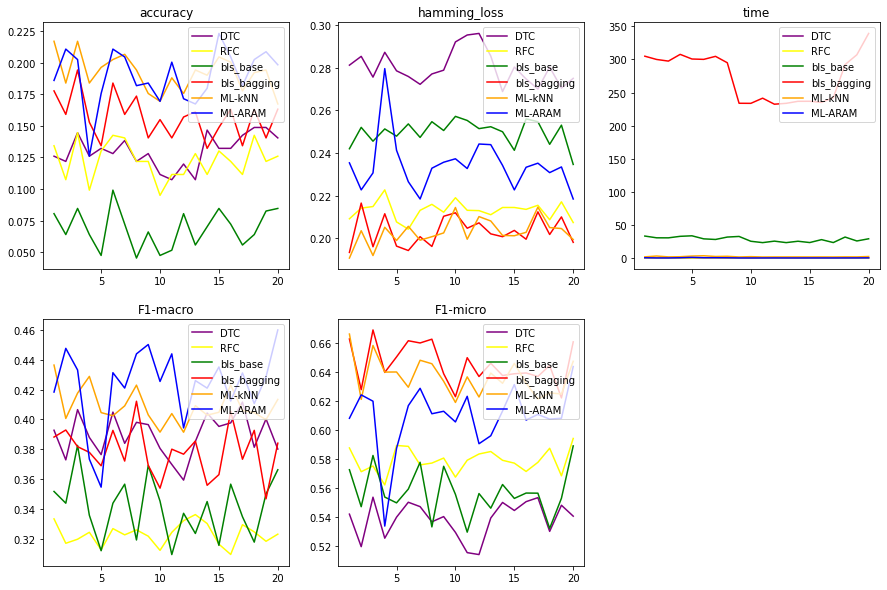

In [10]:
plt.figure(1,figsize=(15,10))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.13026859504132232
the hamming loss of model1 0.28011363636363634
the time of model1 0.45260436499989504
the F1 macro score of model1 0.38925465609395826
the F1 micro score of model1 0.5385915211844242


the accuracy score of model2 0.12272727272727275
the hamming loss of model2 0.21305342384887838
the time of model2 0.28080960999991406
the F1 macro score of model2 0.3228646763727864
the F1 micro score of model2 0.579031639145275


the accuracy score of model3 0.06869834710743801
the hamming loss of model3 0.24977863046044865
the time of model3 28.52751163499991
the F1 macro score of model3 0.3406711444313607
the F1 micro score of model3 0.557117154011846


the accuracy score of model4 0.15671487603305784
the hamming loss of model4 0.2033426800472255
the time of model4 273.69340265499994
the F1 macro score of model4 0.37860493547891655
the F1 micro score of model4 0.645567446245049


the accuracy score of model5 0.1915289256198347
the hamming loss of model

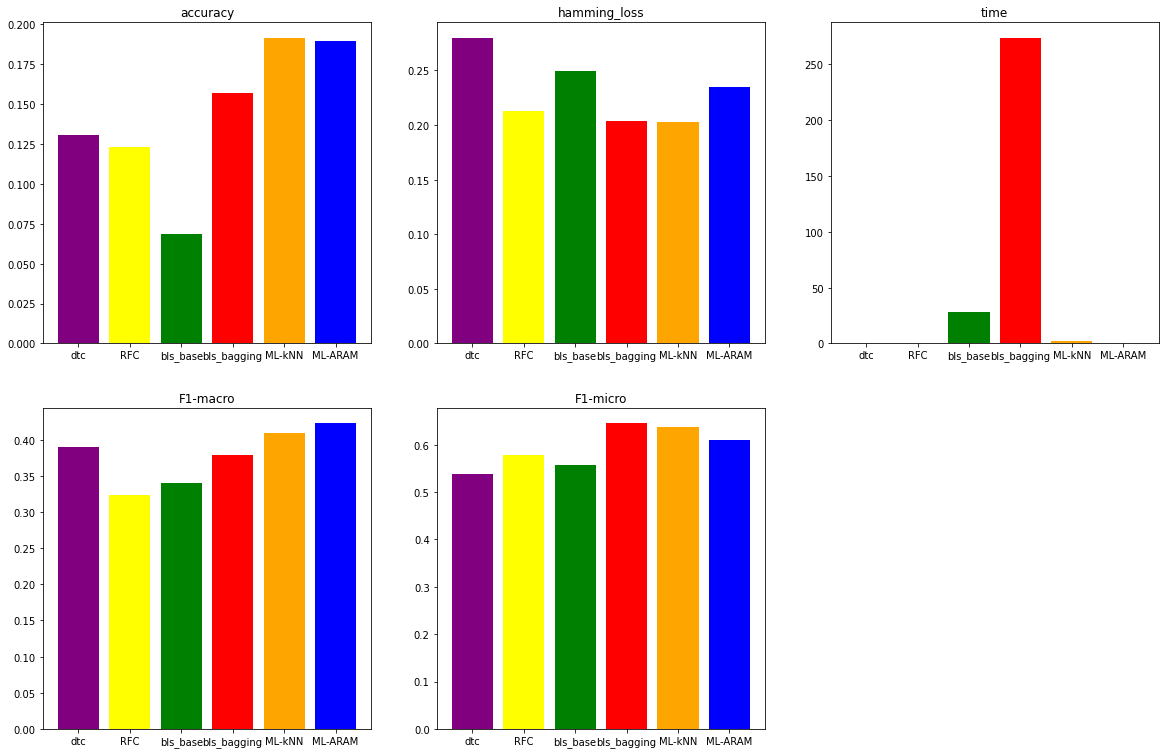

In [13]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4],color=['purple','yellow','green','red','orange','blue'])
plt.show()